In [1]:
import pandas as pd

In [2]:
#1
#Se procede a la carga del csv
df= pd.read_csv("https://raw.githubusercontent.com/dipalira/Melbourne-Housing-Data-Kaggle/master/Data/Melbourne_housing_FULL.csv")

#Se llama .info para tener una vista general de la tabla
df.info()

# Contar el número inicial de datos
total_datos_inicial = len(df)

# Eliminar nulos en la columna 'Price'
df = df.dropna(subset=['Price']).copy()  # <-- Agregar `.copy()` aquí

# Convertir la columna 'Price' a enteros
df.loc[:, 'Price'] = df['Price'].astype(int)  # Usar .loc para asignar valores

# Contar el número final de datos
total_datos_final = len(df)

# Calcular el porcentaje de datos eliminados
porcentaje_eliminado = ((total_datos_inicial - total_datos_final) / total_datos_inicial) * 100

# Resultados
print(f"Porcentaje de datos eliminados: {porcentaje_eliminado:.2f}%")



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34854 non-null  object 
 17  Lattitude      26881 non-null  float64
 18  Longti

In [3]:
#2

#Tipo de propiedad mas comun ="h"
df["Type"].value_counts()

#Definir cuantas veces aparecen
nro_apariciones = df["Type"].value_counts().iloc[0]

#Definir el total de filas en columna type
totaltype=len(df["Type"])

# Calcular el porcentaje de casas type h
porcentaje_typeh = (nro_apariciones/totaltype) * 100

# Resultados
print(f"Porcentaje de tipos de casa H: {porcentaje_typeh:.2f}%")

Porcentaje de tipos de casa H: 67.79%


In [5]:
#3
import plotly.express as px

# Contar las frecuencias de los valores en la columna 'Type'
frecuencias = df["Type"].value_counts()

# Crear gráfico de barras
fig = px.bar(
    x=frecuencias.index,  # Los tipos de propiedad (categorías)
    y=frecuencias.values,  # Sus frecuencias
    title="Frecuencia de cada tipo de propiedad",
    labels={"x": "Tipo de Propiedad", "y": "Frecuencia"},
    text=frecuencias.values,  # Mostrar valores encima de las barras
)



# Mostrar gráfico
fig.show()



In [8]:
#4
median_price = df.groupby('Rooms')['Price'].median().reset_index()

# Crear el gráfico de barras
fig = px.bar(median_price, x='Rooms', y='Price', 
             title='Mediana del Precio por Tipo de Habitación (Room)', 
             labels={'Price': 'Mediana del Precio', 'Room': 'Tipo de Habitación'})

# Mostrar el gráfico
fig.show()

In [9]:
#5 
from scipy.stats import spearmanr
correlacion = df['Rooms'].corr(df['Price'], method='spearman')
correlacion
#La correlación es moderada

0.5042971590926004

In [ ]:
#6
# Crear el scatterplot
fig = px.scatter(df, x='Distance', y='Price', 
                 title='Relación entre Distance y Price',
                 labels={'Distance': 'Distancia', 'Price': 'Precio'})
fig.show()

# Calcular la correlación de Spearman entre 'Distance' y 'Price'
correlacion2= df['Distance'].corr(df['Price'], method='spearman')
correlacion2
#Hay una correlación negativa y debil

-0.18809341092744206

In [15]:
#7
# Calcular la correlación de Spearman entre 'Landsize' y 'Price'
correlacion3= df['Landsize'].corr(df['Price'], method='spearman')
correlacion3
#

# Crear el scatterplot
fig = px.scatter(df, x='Landsize', y='Price', 
                 title='Relación entre Distance y Price',
                 labels={'Distance': 'Distancia', 'Price': 'Precio'})
fig.show()


In [32]:
#8


# Discretizar la columna 'Landsize' en 7 categorías usando qcut
df['Landsize_category'] = pd.qcut(df['Landsize'], q=7, labels=False)


avg_price = df.groupby('Landsize_category', as_index=False)['Price'].mean()

# Crear un barplot usando los promedios calculados
fig = px.bar(avg_price, 
             x='Landsize_category', 
             y='Price', 
             title='Promedio del Precio por Categoría de Landsize', 
             labels={'Price': 'Promedio del Precio', 'Landsize_category': 'Categoría de Landsize'})

# Cambiar color de las barras a azul
fig.update_traces(marker_color='blue')
fig.show()

# Discretizar la columna 'Landsize' en 3 categorías usando qcut
df['Landsize_category_min'] = pd.qcut(df['Landsize'], q=3, labels=False)

avg_price2 = df.groupby('Landsize_category_min', as_index=False)['Price'].mean()
# Crear un barplot para ver la distribución de Price por cada categoría de Landsize
fig2 = px.bar(avg_price2, x='Landsize_category_min', y='Price',
             title='Distribución del Precio por Categoría de Landsize',
             labels={})
# Cambiar color de las barras a azul
fig2.update_traces(marker_color='blue')
fig2.show()


In [33]:
#9
# Crear un boxplot para detectar outliers
fig = px.box(df, y='Price', title='Boxplot para detectar outliers en precio')
fig.show()

# Calcular los percentiles y el IQR para 'Price'
Q1 = df['Price'].quantile(0.25)
Q3 = df['Price'].quantile(0.75)
IQR = Q3 - Q1

# Calcular los límites inferior y superior según el método de Tukey
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Crear un nuevo DataFrame con las propiedades que son outliers
outliers_df = df[(df['Price'] < lower_bound) | (df['Price'] > upper_bound)]

# Calcular el porcentaje de propiedades identificadas como outliers
outliers_percentage = (len(outliers_df) / len(df)) * 100

# Mostrar los resultados
print(f"Propiedades identificadas como outliers: {len(outliers_df)}")
print(f"Porcentaje de propiedades identificadas como outliers: {outliers_percentage:.2f}%")

Propiedades identificadas como outliers: 1278
Porcentaje de propiedades identificadas como outliers: 4.69%


Skew (asimetría) de 'Price': 2.59
Kurtosis de 'Price': 13.10


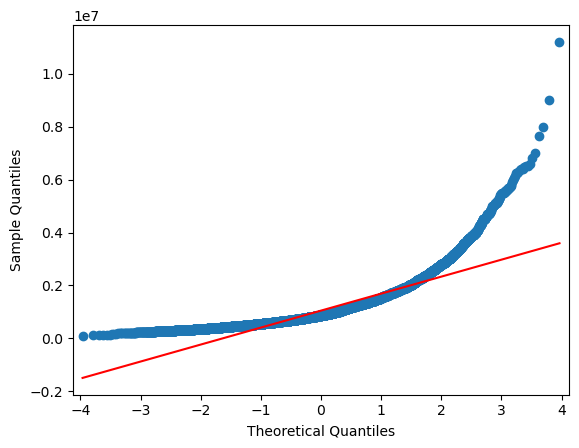

In [35]:
#10
import statsmodels.api as sm

# Q-Q plot para ver la distribucion
sm.qqplot(df['Price'], line='s');

# Calcular skew (asimetría) y kurtosis para la columna 'Price'
skew_value = df['Price'].skew()
kurtosis_value = df['Price'].kurtosis()

# Mostrar los resultados
print(f"Skew (asimetría) de 'Price': {skew_value:.2f}")
print(f"Kurtosis de 'Price': {kurtosis_value:.2f}")

In [37]:
#11
from scipy import stats
standardized_saleprice = (df['Price'] - df['Price'].mean()) / df['Price'].std() 
ks_test_statistic, ks_p_value = stats.kstest(standardized_saleprice, 'norm')

ks_test_statistic, ks_p_value

(0.13751284953784154, 0.0)

In [38]:
#12
# Crear el boxplot entre 'Price' y 'Type'
fig = px.box(df, x='Type', y='Price',
             title='Distribución del Precio por Tipo de Propiedad',
             labels={'Type': 'Tipo', 'Price': 'Precio'})

# Mostrar el gráfico
fig.show()

In [41]:
#13

# Agrupar por 'Region' y calcular el precio promedio de 'Price'
avg_price_by_region = df.groupby('Regionname')['Price'].mean().reset_index()

# Encontrar la región con el precio promedio más alto
most_expensive = avg_price_by_region.loc[avg_price_by_region['Price'].idxmax()]

# Encontrar la región con el precio promedio más bajo
cheapest = avg_price_by_region.loc[avg_price_by_region['Price'].idxmin()]

# Mostrar los resultados
print("Región más cara:")
print(most_expensive)

print("\nRegión más barata:")
print(cheapest)

Región más cara:
Regionname    Southern Metropolitan
Price                1395928.334115
Name: 5, dtype: object

Región más barata:
Regionname    Western Victoria
Price            432606.770833
Name: 7, dtype: object


In [47]:
#14

# Crear categorías para 'Price' usando qcut (dividiéndolo en 4 rangos)
df['Price_category'] = pd.qcut(df['Price'], q=4, labels=['Low', 'Medium', 'High', 'Very High'])

# Crear la tabla de contingencia entre 'Regionname' y 'Price_category'
crosstab_result = pd.crosstab(df['Regionname'], df['Price_category'])

from scipy.stats import chi2_contingency

# Chi-square test for 'Regionname' and 'Price_Category'
chi2_statistic, chi2_p_value, _, _ = chi2_contingency(crosstab_result)

print("Metodo Chi2: ", round(chi2_statistic,2), chi2_p_value)

#Cramer
from scipy.stats.contingency import association

# Computing the association between variables in 'crosstab_result' using the "cramer" method
print("Cramer Método: ", association(crosstab_result, method="cramer"))

Metodo Chi2:  5184.71 0.0
Cramer Método:  0.25186407965075336


In [49]:
#15
# Convertir la columna 'Date' a tipo datetime
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')

# Extraer el año de la columna 'Date'
df['Year'] = df['Date'].dt.year

# Filtrar los datos para los años 2016 y 2018
df_2016 = df[df['Year'] == 2016]
df_2018 = df[df['Year'] == 2018]

# Calcular la mediana de 'Price' para 2016 y 2018
median_2016 = df_2016['Price'].median()
median_2018 = df_2018['Price'].median()

# Calcular el porcentaje de cambio entre 2016 y 2018
percentage_change = ((median_2018 - median_2016) / median_2016) * 100

# Mostrar resultados
print(f"Mediana de Price en 2016: {median_2016}")
print(f"Mediana de Price en 2018: {median_2018}")
print(f"Porcentaje de cambio: {percentage_change}%")


Mediana de Price en 2016: 885000.0
Mediana de Price en 2018: 836500.0
Porcentaje de cambio: -5.480225988700565%


In [51]:

#16
# Si la columna 'Date' ya está en formato datetime
df['Month'] = df['Date'].dt.month

# Contar las casas vendidas por mes
houses_per_month = df['Month'].value_counts().sort_index()

# Ordenar las ventas por mes en orden descendente
houses_per_month_desc = houses_per_month.sort_values(ascending=False)

# Mostrar el resultado
print(houses_per_month_desc)


Month
11    3408
9     3219
10    3118
5     2620
6     2425
3     2362
7     2359
8     2324
2     2067
12    1490
4     1206
1      649
Name: count, dtype: int64
